<a href="https://colab.research.google.com/github/ramadhanridho16/Pandas_User_Guide/blob/main/Pandas_Quick_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Object Creation

In [2]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,2.039247,1.661025,-2.080260,-1.723557
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449
2013-01-05,0.495331,0.781626,-0.883739,1.303028
2013-01-06,-0.570140,0.323424,-0.530822,0.851217


In [5]:
# Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

df2 = pd.DataFrame(
    {
      "A": 1.0,
      "B": pd.Timestamp("20130102"),
      "C": pd.Series(1, index=list(range(4)), dtype="float32"),
      "D": np.array([3]*4, dtype="int32"),
      "E": pd.Categorical(["test", "train", "test", "train"]),
      "F": "foo"
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# The columns of the resulting DataFrame have different dtypes:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

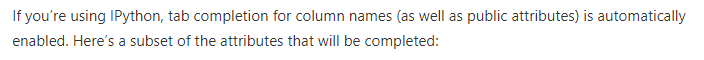

# Viewing Data

In [7]:
# How to view the top rows of the frame

df.head()

,A,B,C,D
2013-01-01,2.039247,1.661025,-2.080260,-1.723557
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449
2013-01-05,0.495331,0.781626,-0.883739,1.303028


In [8]:
# Hot to view bottom rows of the frame

df.tail(3)

,A,B,C,D
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449
2013-01-05,0.495331,0.781626,-0.883739,1.303028
2013-01-06,-0.570140,0.323424,-0.530822,0.851217


In [9]:
# Display the index:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# Display the columns :

df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

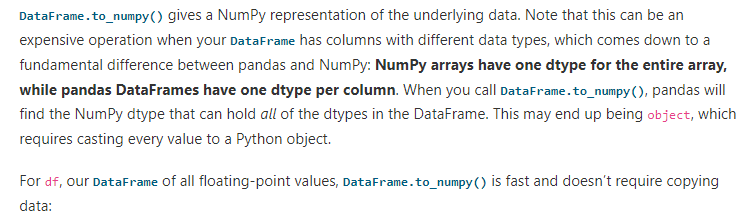

In [11]:
# DFor df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

df.to_numpy()

array([[ 2.03924729,  1.66102454, -2.08025987, -1.72355736],
       [ 0.29615971, -1.08134113,  1.87353791, -0.65603811],
       [-0.16796339,  0.15890749, -0.18815119, -0.71834919],
       [-0.0924889 ,  0.19876927, -0.51860196, -0.49044855],
       [ 0.49533148,  0.78162561, -0.88373919,  1.30302814],
       [-0.57014005,  0.32342361, -0.53082158,  0.85121741]])

In [12]:
# For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

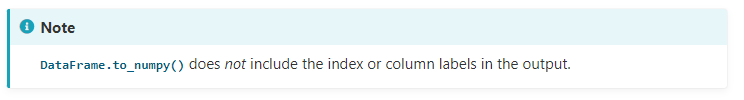

In [13]:
# describe() shows a quick statistic summary of your data:

df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.333358,0.340402,-0.388006,-0.239025
std,0.915058,0.895920,1.288522,1.116894
min,-0.570140,-1.081341,-2.080260,-1.723557
25%,-0.149095,0.168873,-0.795510,-0.702771
50%,0.101835,0.261096,-0.524712,-0.573243
75%,0.445539,0.667075,-0.270764,0.515801
max,2.039247,1.661025,1.873538,1.303028


In [14]:
# Transposing your data:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,2.039247,0.296160,-0.167963,-0.092489,0.495331,-0.570140
B,1.661025,-1.081341,0.158907,0.198769,0.781626,0.323424
C,-2.080260,1.873538,-0.188151,-0.518602,-0.883739,-0.530822
D,-1.723557,-0.656038,-0.718349,-0.490449,1.303028,0.851217


In [15]:
# Sorting by an axis:

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.723557,-2.080260,1.661025,2.039247
2013-01-02,-0.656038,1.873538,-1.081341,0.296160
2013-01-03,-0.718349,-0.188151,0.158907,-0.167963
2013-01-04,-0.490449,-0.518602,0.198769,-0.092489
2013-01-05,1.303028,-0.883739,0.781626,0.495331
2013-01-06,0.851217,-0.530822,0.323424,-0.570140


In [16]:
# Sorting by values:
df.sort_values(by="B", ascending=False)

,A,B,C,D
2013-01-01,2.039247,1.661025,-2.080260,-1.723557
2013-01-05,0.495331,0.781626,-0.883739,1.303028
2013-01-06,-0.570140,0.323424,-0.530822,0.851217
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349
2013-01-02,0.296160,-1.081341,1.873538,-0.656038


# Selection

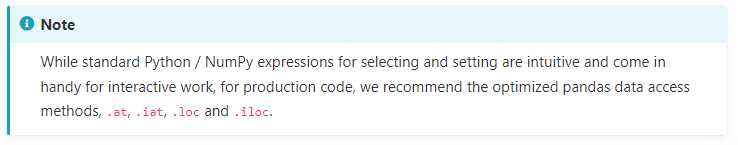

## Getting

In [17]:
# Selecting a single column, which give result a "Series", equivalent to df.A:
df["A"]

2013-01-01    2.039247
2013-01-02    0.296160
2013-01-03   -0.167963
2013-01-04   -0.092489
2013-01-05    0.495331
2013-01-06   -0.570140
Freq: D, Name: A, dtype: float64

In [18]:
# selecting via [], which slice the rows:

df[0:3]

,A,B,C,D
2013-01-01,2.039247,1.661025,-2.080260,-1.723557
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449


## Selection by label

In [20]:
# getting cross section using label
df.loc[dates[0]]

A    2.039247
B    1.661025
C   -2.080260
D   -1.723557
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# Selecting on a multi-axis by label:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,2.039247,1.661025
2013-01-02,0.296160,-1.081341
2013-01-03,-0.167963,0.158907
2013-01-04,-0.092489,0.198769
2013-01-05,0.495331,0.781626
2013-01-06,-0.570140,0.323424


In [22]:
# Showing label slicing, both endpoints are included

df.loc["20130102":"20130104",["A", "B"]]

,A,B
2013-01-02,0.296160,-1.081341
2013-01-03,-0.167963,0.158907
2013-01-04,-0.092489,0.198769


In [23]:
# Reduction in the dimensions of the returned object:
df.loc["20130102", ["A", "B"]]

A    0.296160
B   -1.081341
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
# Getting scalar value

df.loc[dates[0], "A"]

2.0392472893965006

In [25]:
# For getting fast access to a scalar (equivalent to the prior method):

df.at[dates[0], "A"]

2.0392472893965006

## Selection by position

In [26]:
# Select via the position of the pased integers

df.iloc[3]

A   -0.092489
B    0.198769
C   -0.518602
D   -0.490449
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# By integer slices, acting similar to NumPy/Python
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.092489,0.198769
2013-01-05,0.495331,0.781626


In [28]:
# By lists of integer position locations, similar to the NumPy/Python style:
# column, rows
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.296160,1.873538
2013-01-03,-0.167963,-0.188151
2013-01-05,0.495331,-0.883739


In [29]:
# For slicing rows explicitly
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349


In [30]:
# For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.661025,-2.080260
2013-01-02,-1.081341,1.873538
2013-01-03,0.158907,-0.188151
2013-01-04,0.198769,-0.518602
2013-01-05,0.781626,-0.883739
2013-01-06,0.323424,-0.530822


In [31]:
# For getting a value explicitly
df.iloc[1, 1]

-1.0813411255525696

In [32]:
# For getting fast access to a scalar(equivalent to the prior method):
df.iat[1, 1]

-1.0813411255525696

## Boolean indexing

In [33]:
# Using a single column's values to select data:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,2.039247,1.661025,-2.080260,-1.723557
2013-01-02,0.296160,-1.081341,1.873538,-0.656038
2013-01-05,0.495331,0.781626,-0.883739,1.303028


In [34]:
# Selecting values from a DataFrame where a boolean condition is met:
df[df > 0]

,A,B,C,D
2013-01-01,2.039247,1.661025,NaN,NaN
2013-01-02,0.296160,NaN,1.873538,NaN
2013-01-03,NaN,0.158907,NaN,NaN
2013-01-04,NaN,0.198769,NaN,NaN
2013-01-05,0.495331,0.781626,NaN,1.303028
2013-01-06,NaN,0.323424,NaN,0.851217


In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,2.039247,1.661025,-2.080260,-1.723557,one
2013-01-02,0.296160,-1.081341,1.873538,-0.656038,one
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349,two
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449,three
2013-01-05,0.495331,0.781626,-0.883739,1.303028,four
2013-01-06,-0.570140,0.323424,-0.530822,0.851217,three


In [36]:
# Using the isin() method for filtering:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349,two
2013-01-05,0.495331,0.781626,-0.883739,1.303028,four


## Setting

In [37]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,2.039247,1.661025,-2.080260,-1.723557,NaN
2013-01-02,0.296160,-1.081341,1.873538,-0.656038,1.0
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349,2.0
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449,3.0
2013-01-05,0.495331,0.781626,-0.883739,1.303028,4.0
2013-01-06,-0.570140,0.323424,-0.530822,0.851217,5.0


In [39]:
# Setting values by label:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.661025,-2.080260,-1.723557,NaN
2013-01-02,0.296160,-1.081341,1.873538,-0.656038,1.0
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349,2.0
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449,3.0
2013-01-05,0.495331,0.781626,-0.883739,1.303028,4.0
2013-01-06,-0.570140,0.323424,-0.530822,0.851217,5.0


In [40]:
# Setting values by position:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.080260,-1.723557,NaN
2013-01-02,0.296160,-1.081341,1.873538,-0.656038,1.0
2013-01-03,-0.167963,0.158907,-0.188151,-0.718349,2.0
2013-01-04,-0.092489,0.198769,-0.518602,-0.490449,3.0
2013-01-05,0.495331,0.781626,-0.883739,1.303028,4.0
2013-01-06,-0.570140,0.323424,-0.530822,0.851217,5.0


In [41]:
# setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5]*len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.080260,5,NaN
2013-01-02,0.296160,-1.081341,1.873538,5,1.0
2013-01-03,-0.167963,0.158907,-0.188151,5,2.0
2013-01-04,-0.092489,0.198769,-0.518602,5,3.0
2013-01-05,0.495331,0.781626,-0.883739,5,4.0
2013-01-06,-0.570140,0.323424,-0.530822,5,5.0


# Missing data

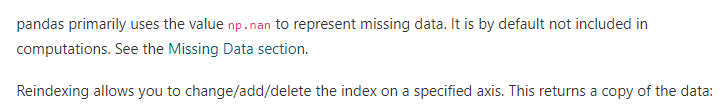

In [42]:
# Reindexing allows you to change/add/delete the index on a specified axis
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.080260,5,NaN,NaN
2013-01-02,0.296160,-1.081341,1.873538,5,1.0,NaN
2013-01-03,-0.167963,0.158907,-0.188151,5,2.0,NaN
2013-01-04,-0.092489,0.198769,-0.518602,5,3.0,NaN


In [43]:
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.080260,5,NaN,1.0
2013-01-02,0.296160,-1.081341,1.873538,5,1.0,1.0
2013-01-03,-0.167963,0.158907,-0.188151,5,2.0,NaN
2013-01-04,-0.092489,0.198769,-0.518602,5,3.0,NaN


In [44]:
# To drop any rows that have missing data:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.29616,-1.081341,1.873538,5,1.0,1.0


In [45]:
# Filling missing data:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.080260,5,5.0,1.0
2013-01-02,0.296160,-1.081341,1.873538,5,1.0,1.0
2013-01-03,-0.167963,0.158907,-0.188151,5,2.0,5.0
2013-01-04,-0.092489,0.198769,-0.518602,5,3.0,5.0


In [46]:
# To get the boolean mask where values are nan:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

See the Basic section on Binary Ops

## Stats

Operations in general exclude missing data

In [47]:
# Performing a descriptive statistic
df.mean()

A   -0.006517
B    0.063564
C   -0.388006
D    5.000000
F    3.000000
dtype: float64

In [48]:
# Same operation on the other axis:
df.mean(1)

2013-01-01    0.729935
2013-01-02    1.417671
2013-01-03    1.360559
2013-01-04    1.517536
2013-01-05    1.878644
2013-01-06    1.844492
Freq: D, dtype: float64

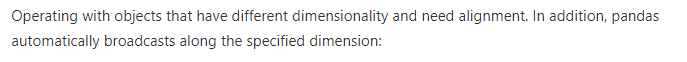

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.167963,-0.841093,-1.188151,4.0,1.0
2013-01-04,-3.092489,-2.801231,-3.518602,2.0,0.0
2013-01-05,-4.504669,-4.218374,-5.883739,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [51]:
# Applying functions to the data

df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.080260,5,NaN
2013-01-02,0.296160,-1.081341,-0.206722,10,1.0
2013-01-03,0.128196,-0.922434,-0.394873,15,3.0
2013-01-04,0.035707,-0.723664,-0.913475,20,6.0
2013-01-05,0.531039,0.057961,-1.797214,25,10.0
2013-01-06,-0.039101,0.381385,-2.328036,30,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    1.065472
B    1.862967
C    3.953798
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    0
3    6
4    6
5    1
6    3
7    6
8    6
9    3
dtype: int64

In [54]:
s.value_counts()

6    4
1    2
3    2
2    1
0    1
dtype: int64

## String Methods

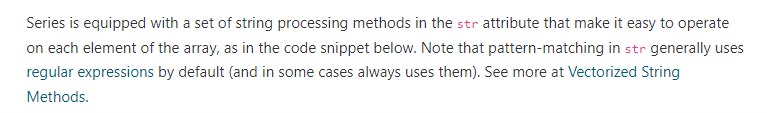

In [55]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

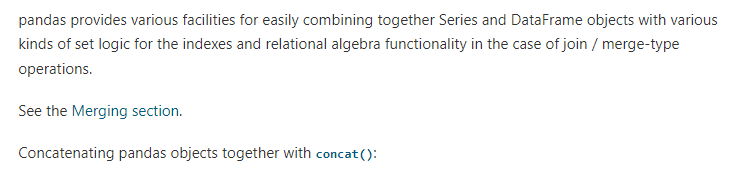

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-2.023314,-0.496966,1.166943,-1.420317
1,0.314778,0.284870,-0.154791,1.015276
2,-0.285282,2.011908,0.856850,-1.173163
3,-0.894555,0.298006,0.853245,-0.721710
4,0.857062,1.445985,0.579965,-0.628749
5,-0.024423,-0.107843,0.315078,-1.352515
6,1.638268,-0.970522,-0.086093,1.333160
7,0.124757,0.202009,0.165549,0.315631
8,-0.195570,0.368451,-0.063459,-1.103750
9,1.094405,0.151566,-0.145510,-0.186322


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -2.023314 -0.496966  1.166943 -1.420317
 1  0.314778  0.284870 -0.154791  1.015276
 2 -0.285282  2.011908  0.856850 -1.173163,
           0         1         2         3
 3 -0.894555  0.298006  0.853245 -0.721710
 4  0.857062  1.445985  0.579965 -0.628749
 5 -0.024423 -0.107843  0.315078 -1.352515
 6  1.638268 -0.970522 -0.086093  1.333160,
           0         1         2         3
 7  0.124757  0.202009  0.165549  0.315631
 8 -0.195570  0.368451 -0.063459 -1.103750
 9  1.094405  0.151566 -0.145510 -0.186322]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,-2.023314,-0.496966,1.166943,-1.420317
1,0.314778,0.284870,-0.154791,1.015276
2,-0.285282,2.011908,0.856850,-1.173163
3,-0.894555,0.298006,0.853245,-0.721710
4,0.857062,1.445985,0.579965,-0.628749
5,-0.024423,-0.107843,0.315078,-1.352515
6,1.638268,-0.970522,-0.086093,1.333160
7,0.124757,0.202009,0.165549,0.315631
8,-0.195570,0.368451,-0.063459,-1.103750
9,1.094405,0.151566,-0.145510,-0.186322


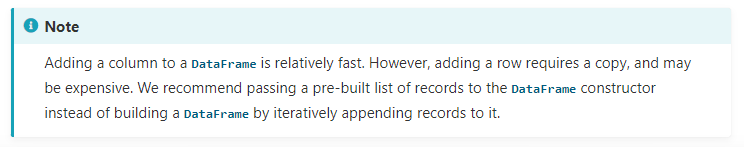

## Join

In [63]:
# SQL style merges. See the database style joining section

left = pd.DataFrame({"key": ["foo", "foo"], "lval":[1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [64]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval":[4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [65]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [67]:
# Another example that can be given is:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [70]:
left

,key,lval
0,foo,1
1,bar,2


In [71]:
right

,key,rval
0,foo,4
1,bar,5


In [72]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping